# 내 이미지 사용

여러분이 열심히 이미지를 모얐고 그이미지들로 분류하는 모델을 만들고 싶을 것입니다. 어떻게 하면 하면 될까요? 먼저

1. 이미지 데이터를 구성하는 방법

을 알고 프로그램으로

2. 이미지 데이터를 읽어들이는 코드의 사용법

을 알고 읽어들인 데이터의 형태를 알 수 있다면 우리는 우리가 가진 이미즈를 사용할 수 있을 것입니다.

<center>
<img src='https://drive.google.com/uc?id=1pbJSqpsUPFvVT9w6le7dZ4OsEJDOmUBy ' /><br>
</center>

우리가 이번에 사용해 볼 데이터는 notMNIST 라는 이미지셋이에요 MNIST는 숫자 이미지였는데 notMNIST 는 알파벳을 분류하는 것입니다. a 부터 z 까지 총 10개의 분류가 있습니다.
데이터 다운받기 https://drive.google.com/file/d/1kOeKYRqL3Xh7B2CmVGbeRplOo8VgQaKc/view?usp=drive_link

우리가 익숙하게 이미지를 정리하는 방식이라고 생각하셔도 무방합니다. a 라는 이미지는  a 라는 톨더에 모으고 b라는 이미지는 b라는 폴더에 모은 것이죠. 강아지 폴더에 강아지, 고양이 폴더에 고양이 폴더에 모으면 됩니다.
하나 주의해할 것은 이미지 크기가 다 다르기 때문에 이미지 편집도구들의 리사이 기능을 이용해서 이미지 사이즈를 통일해 주어야 합니다.

In [ ]:
from google.colab import drive # 구글드라이버에 있는 파일 사용하기
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 이미지 읽어서 데이터 준비하기
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

paths = glob.glob('./notMNIST_small/*/*.png') # 파일 경로를 정확하게 넣어 주어야 한다. glob.glob : 경로명을 가져온다
paths = np.random.permutation(paths) # 경로들을 가져와서 랜덤하게 섞어 준다.
독립 = np.array([plt.imread(paths[i]) for i in range(len(paths))]) # 흑백 이미지이므로 3차원 형태
종속 = np.array([paths[i].split('/')[-2] for i in range(len(paths))]) # 폴더에 정답이 들어 있다. a라는 정답 b라는 정답이 들어 있는 데 그 정답을 가져와서 그값으로 채운 것.
print(독립.shape, 종속.shape)

(18724, 28, 28) (18724,)


In [ ]:
종속[0:10] # 0~ 10까지를 읽어 옴.

array(['B', 'F', 'B', 'I', 'D', 'B', 'G', 'B', 'E', 'C'], dtype='<U1')

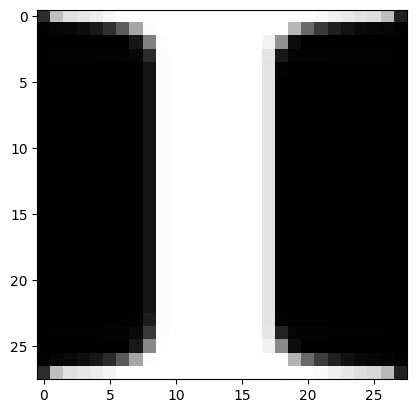

In [ ]:
plt.imshow(독립[3], cmap='gray') # 독립변수 3번 인덱스의 이미지를 불러온다

In [ ]:
독립 = 독립.reshape(18724, 28, 28, 1) # 4차원 형태로 reshape
종속 = pd.get_dummies(종속) # 2차원 형태로
print(독립.shape, 종속.shape) # 학습시킬수 있는 형태로 변형됨.

(18724, 28, 28, 1) (18724, 10)


In [ ]:
import tensorflow as tf

# 모델을 완성합니다.
X = tf.keras.layers.Input(shape=[28, 28, 1])

H = tf.keras.layers.Conv2D(6, kernel_size=5, padding='same', activation='swish')(X)
H = tf.keras.layers.MaxPool2D()(H)

H = tf.keras.layers.Conv2D(16, kernel_size=5, activation='swish')(H)
H = tf.keras.layers.MaxPool2D()(H)

H = tf.keras.layers.Flatten()(H)
H = tf.keras.layers.Dense(120, activation='swish')(H)
H = tf.keras.layers.Dense(84, activation='swish')(H)
Y = tf.keras.layers.Dense(10, activation='softmax')(H)

model = tf.keras.models.Model(X, Y)
model.compile(loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(독립, 종속, epochs=10)

Epoch 1/10
586/586 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7589 - loss: 0.8135
Epoch 2/10
586/586 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9144 - loss: 0.2930
Epoch 3/10
586/586 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9326 - loss: 0.2239
Epoch 4/10
586/586 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9471 - loss: 0.1754
Epoch 5/10
586/586 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9542 - loss: 0.1523
Epoch 6/10
586/586 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9603 - loss: 0.1269
Epoch 7/10
586/586 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9655 - loss: 0.1065
Epoch 8/10
586/586 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9720 - loss: 0.0894
Epoch 9/10
586/586 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9748 - loss: 0.0769
Epoch 10/10
586/586 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9806 - loss: 0.0585
